In [1]:
%autosave 7200

Autosaving every 7200 seconds


In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

In [4]:
def standard_units(arr):
    "Convert any array of numbers to standard units."
    return (arr - np.mean(arr))/np.std(arr)

In [5]:
def correlation(t, label_x, label_y):
    x_standard = standard_units(t.column(label_x))
    y_standard = standard_units(t.column(label_y))
    return np.mean(x_standard * y_standard)

In [6]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
         'x', x,
         'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


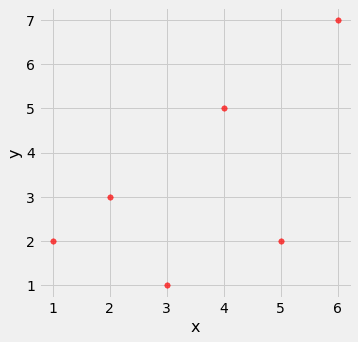

In [7]:
t.scatter('x', 'y', s=30, color='red')

In [8]:
t = t.with_columns(
    'x (std units)', standard_units(x),
    'y (std units)', standard_units(y))
t

x,y,x (std units),y (std units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


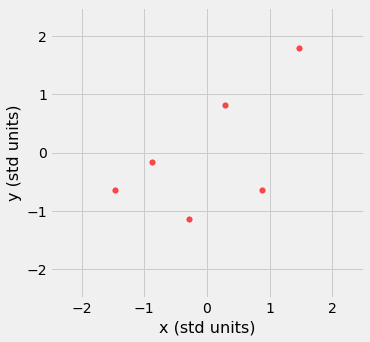

In [9]:
t.scatter('x (std units)', 'y (std units)', s=30, color='red')
plots.xlim(-2.5, 2.5)
plots.ylim(-2.5, 2.5);

In [10]:
x_standard = t.column('x (std units)')
y_standard = t.column('y (std units)')
t = t.with_column(
    'product in standard units', x_standard * y_standard)
t

x,y,x (std units),y (std units),product in standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [11]:
r = np.mean(t.column('product in standard units'))
r

0.6174163971897709

In [12]:
correlation(t, 'x', 'y')

0.6174163971897709

In [13]:
hybrid = Table.read_table('hybrid.csv').drop('year')
hybrid

vehicle,msrp,acceleration,mpg,class
Prius (1st Gen),24509.7,7.46,41.26,Compact
Tino,35355,8.2,54.1,Compact
Prius (2nd Gen),26832.2,7.97,45.23,Compact
Insight,18936.4,9.52,53,Two Seater
Civic (1st Gen),25833.4,7.04,47.04,Compact
Insight,19036.7,9.52,53,Two Seater
Insight,19137,9.71,53,Two Seater
Alphard,38084.8,8.33,40.46,Minivan
Insight,19137,9.52,53,Two Seater
Civic,14071.9,8.62,41,Compact


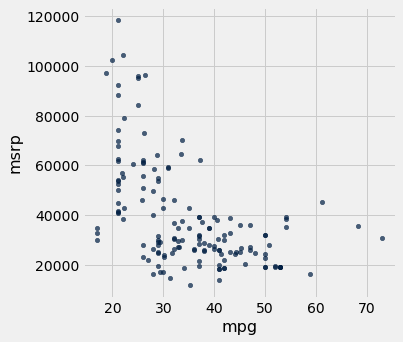

In [14]:
hybrid.scatter('mpg', 'msrp')

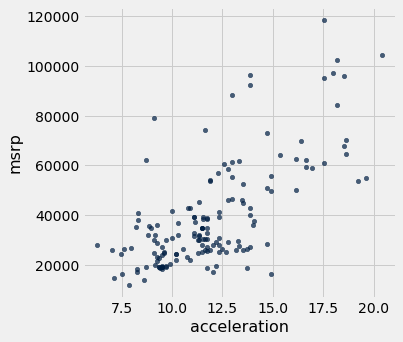

In [15]:
hybrid.scatter('acceleration', 'msrp')

In [16]:
suv = hybrid.where('class','SUV')

In [17]:
suv = suv.with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp')),
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
)
suv

vehicle,msrp,acceleration,mpg,class,mpg (standard units),msrp (standard units),acceleration (standard units)
Escape,36676.1,10.32,31.99,SUV,1.31784,-0.60884,-1.16157
Lexus RX400h,58521.1,12.76,28.23,SUV,0.48955,0.605991,-0.0718039
Highlander,29186.2,12.76,29.4,SUV,0.747288,-1.02536,-0.0718039
Escape 2WD,19322.6,9.52,29,SUV,0.659172,-1.57389,-1.51888
Mercury Mariner,34772.4,8.98,32.93,SUV,1.52491,-0.714707,-1.76005
Chevrolet Tahoe,42924.3,10.91,22.35,SUV,-0.805749,-0.261367,-0.898064
Kluger,46229.5,12.76,25.87,SUV,-0.0303321,-0.0775641,-0.0718039
Tribute,24823.8,11.28,31.75,SUV,1.26497,-1.26796,-0.732812
GMC Yukon,57094.8,12.28,21.78,SUV,-0.931314,0.526671,-0.286185
Vue,22938.3,10.75,26,SUV,-0.00169453,-1.37281,-0.969524


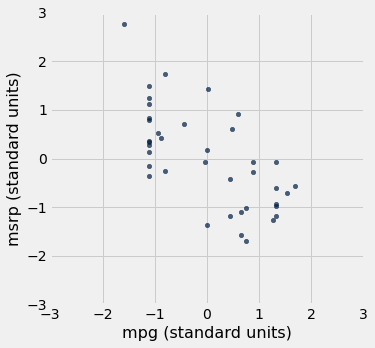

In [18]:
suv.scatter('mpg (standard units)', 'msrp (standard units)')
plots.xlim(-3, 3)
plots.ylim(-3, 3);

In [19]:
correlation(suv, 'mpg','msrp')

-0.6667143635709919

In [20]:
correlation(suv, 'msrp','mpg')

-0.6667143635709919

In [21]:
correlation(suv, 'mpg (standard units)', 'msrp (standard units)')

-0.6667143635709918

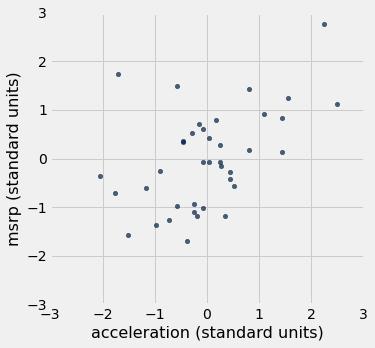

In [22]:
suv.scatter('acceleration (standard units)', 'msrp (standard units)')
plots.xlim(-3, 3)
plots.ylim(-3, 3);

In [23]:
correlation(suv, 'acceleration','msrp')

0.48699799279959155

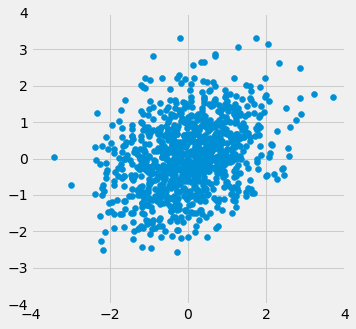

In [24]:
r_scatter(0.3)

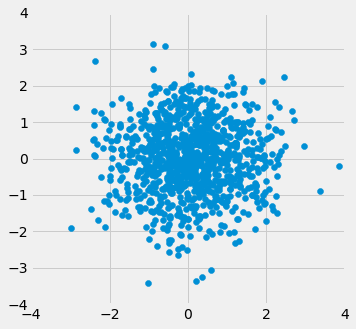

In [25]:
r_scatter(0)

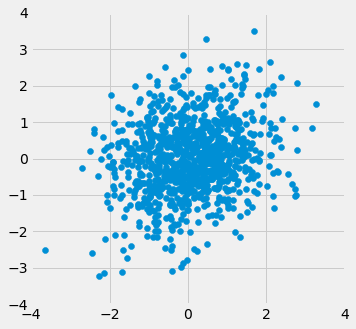

In [26]:
r_scatter(0.2)

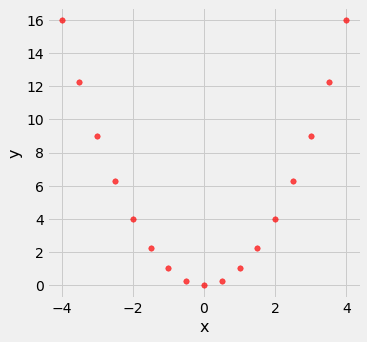

In [27]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [28]:
correlation(nonlinear, 'x', 'y')

0.0

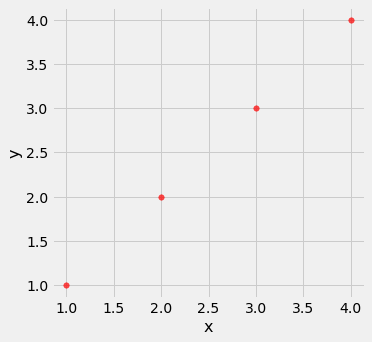

In [29]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [30]:
correlation(line, 'x', 'y')

1.0

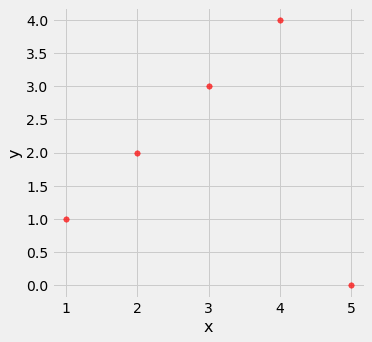

In [31]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [32]:
correlation(outlier, 'x', 'y')

0.0

In [33]:
sat2014 = Table.read_table('sat2014.csv').sort('State').drop('Participation Rate', 'Writing','Combined')
sat2014

State,Critical Reading,Math
Alabama,547,538
Alaska,507,503
Arizona,522,525
Arkansas,573,571
California,498,510
Colorado,582,586
Connecticut,507,510
Delaware,456,459
District of Columbia,440,438
Florida,491,485


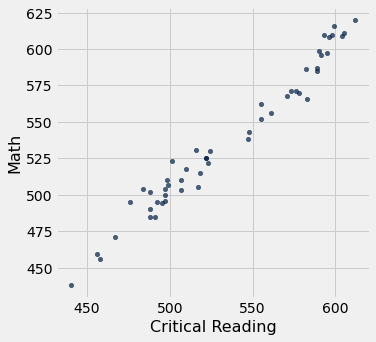

In [34]:
sat2014.scatter('Critical Reading', 'Math')

In [35]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067434